In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("dataset.csv")
df = shuffle(df)
df.head()

,age,ethnicity,gender,img_name,pixels
17284,46,0,1,20170120133524101.jpg.chip.jpg,94 79 51 58 65 83 80 72 69 66 78 68 84 95 90 8...
10982,30,2,1,20170116192241195.jpg.chip.jpg,88 59 33 29 29 25 14 20 45 68 89 99 111 120 13...
11144,30,0,0,20170116232936514.jpg.chip.jpg,43 38 38 44 36 73 95 108 123 130 133 139 142 1...
15059,38,3,1,20170117121011234.jpg.chip.jpg,3 2 1 1 2 5 5 6 10 20 33 49 63 78 99 111 120 1...
21170,64,1,0,20170120224617161.jpg.chip.jpg,173 146 129 111 101 123 135 134 135 135 134 14...


In [3]:
num_pixels = len(df['pixels'][0].split(" "))
img_height = int(np.sqrt(len(df['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(df['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [4]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))
df.head()

,age,ethnicity,gender,img_name,pixels
17284,46,0,1,20170120133524101.jpg.chip.jpg,"[94.0, 79.0, 51.0, 58.0, 65.0, 83.0, 80.0, 72...."
10982,30,2,1,20170116192241195.jpg.chip.jpg,"[88.0, 59.0, 33.0, 29.0, 29.0, 25.0, 14.0, 20...."
11144,30,0,0,20170116232936514.jpg.chip.jpg,"[43.0, 38.0, 38.0, 44.0, 36.0, 73.0, 95.0, 108..."
15059,38,3,1,20170117121011234.jpg.chip.jpg,"[3.0, 2.0, 1.0, 1.0, 2.0, 5.0, 5.0, 6.0, 10.0,..."
21170,64,1,0,20170120224617161.jpg.chip.jpg,"[173.0, 146.0, 129.0, 111.0, 101.0, 123.0, 135..."


In [5]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


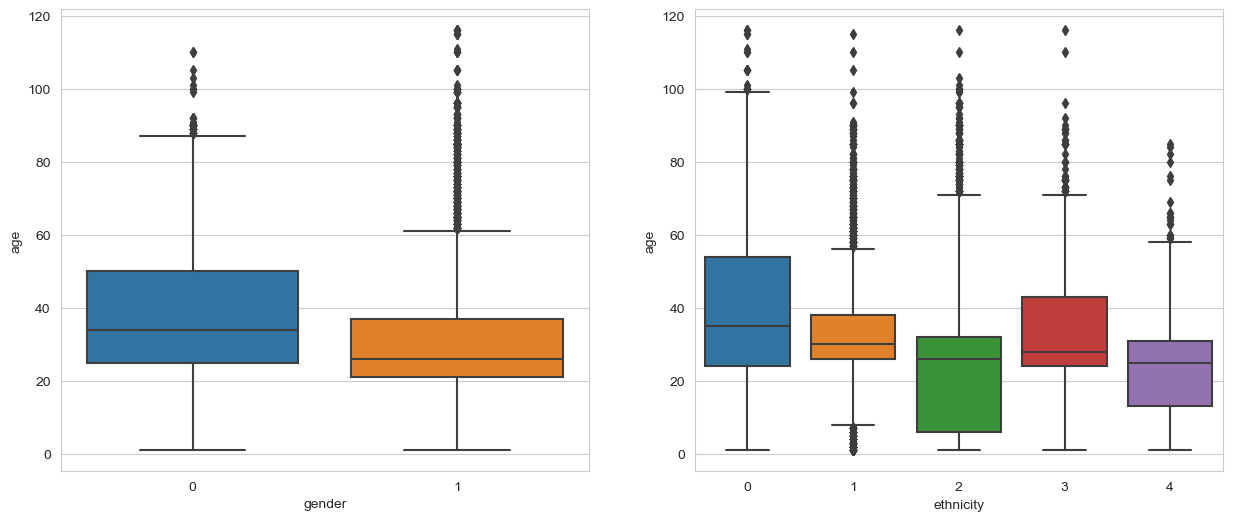

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
_ = sns.boxplot(data=df, x='gender', y='age', ax=ax1)
_ = sns.boxplot(data=df, x='ethnicity', y='age', ax=ax2)

<Axes: xlabel='gender', ylabel='age'>

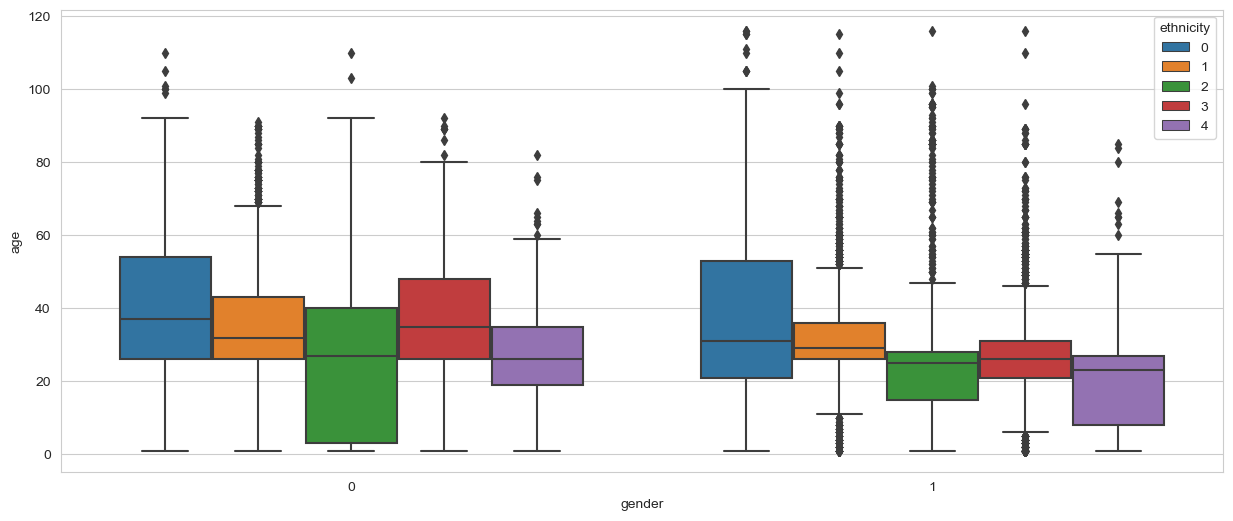

In [7]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='gender', y='age', hue='ethnicity')

<Axes: xlabel='ethnicity,gender'>

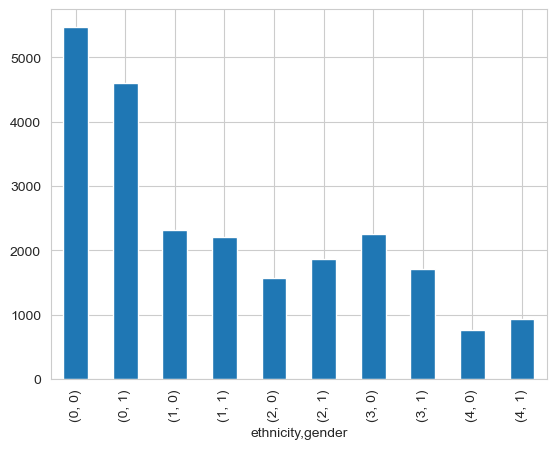

In [8]:
df.groupby(by=['ethnicity', 'gender'])['age'].count().plot(kind='bar')

In [9]:
df['age'].min(), df['age'].max()

(1, 116)

<Axes: >

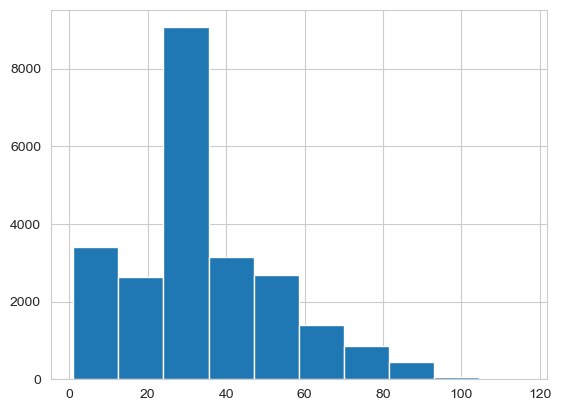

In [10]:
df['age'].hist()

In [11]:
df['age'].describe()

count    23705.000000
mean        33.300907
std         19.885708
min          1.000000
25%         23.000000
50%         29.000000
75%         45.000000
max        116.000000
Name: age, dtype: float64

In [12]:
df.isnull().values.any()

False

In [13]:
df.shape

(23705, 5)

In [14]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

C:\Users\yasin\AppData\Local\Temp\ipykernel_4768\271260352.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color = 'cyan')


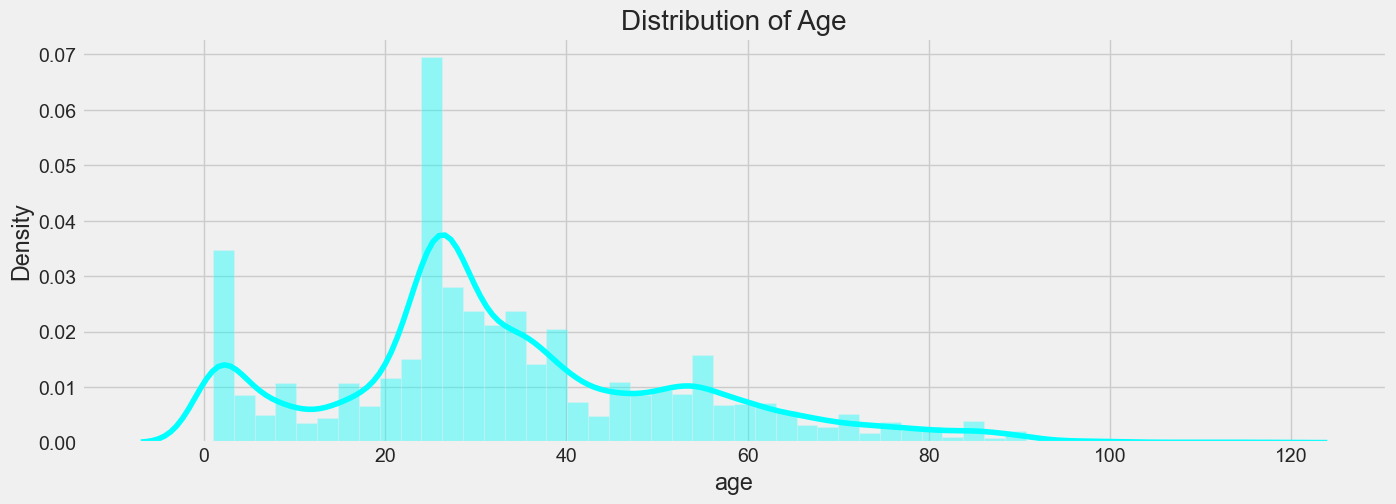

In [15]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

In [16]:
df['z_score'] = (df['age'] - df['age'].mean()) / df['age'].std()
df_outliers_z = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
print(df_outliers_z)

       age  ethnicity  gender                        img_name  \
23680   96          2       1  20170110183528193.jpg.chip.jpg   
1285   100          0       1  20170117195420803.jpg.chip.jpg   
23684   96          2       1  20170105174624519.jpg.chip.jpg   
23690   96          0       1  20170110172637082.jpg.chip.jpg   
1293   105          0       1  20170112213507183.jpg.chip.jpg   
...    ...        ...     ...                             ...   
1288   100          2       1  20170112213615815.jpg.chip.jpg   
23686   96          2       1  20170110182504813.jpg.chip.jpg   
23704   99          0       1  20170110182052119.jpg.chip.jpg   
23669   93          2       1  20170110173119858.jpg.chip.jpg   
1282   100          0       1  20170112213001988.jpg.chip.jpg   

                                                  pixels   z_score  
23680  [110.0, 98.0, 114.0, 103.0, 108.0, 111.0, 116....  3.152973  
1285   [2.0, 80.0, 81.0, 81.0, 81.0, 81.0, 83.0, 84.0...  3.354122  
23684  [6.0,

In [17]:
Q1,Q3=df["age"].quantile([0.25,0.75])
IQR=Q3-Q1
Lower_Limit,Upper_Limit=Q1-(1.5*IQR),Q3+(1.5*IQR)

In [18]:
stats_significant_data,outlying_data=df[(df["age"]>=Lower_Limit)&(df["age"]<=Upper_Limit)],df[(df["age"]<Lower_Limit)|(df["age"]>Upper_Limit)]

In [19]:
print('The lower limit is:\t',Lower_Limit,'\nThe upper limit is:\t',Upper_Limit,'\n\nThe indexes of outlying data is: below\n',outlying_data.index.values,'\n\nThe Statistically Significant data is below:\n\n')
stats_significant_data

The lower limit is:	 -10.0 
The upper limit is:	 78.0 

The indexes of outlying data is: below
 [23172 23242 23680 22634 23367 23233 23136 23657 23047 22963 23147 23269
 23580 23287 23243 23162 23156 23108  1285 23177 23109 22618 23145 23684
 22929 22962 23335 23359 22900 23103 23016 23062 23380 23358 23391 22952
 23069 23329 22976 23690 23053 23289 23646 22943  1293 23099 23265 22627
 23645 23123 22904 23685 23379  1283 23076 23313 23259  1279 23302  1284
 23022 23137 23001 23306 23602 23126 22953 23292 23598 23037 23157 23110
 23171 23314 23700 23070 23169 23239 22986 23353 23079 23222 23013 23004
 23396 23241 23245 23347 23115 23663 23183 23592 22909 23194 23356 23312
  1370 23311 22989 22614 23615  1295 23100 23229 23086 23075 23340 23679
 23260 23362 23247 23195 23276 23319 22971 23653 22954 23119 23082 22996
 23249 23093 22967 23150 23101 23138 22939 23008 23331 23130 23633 23199
 23659 22950 23007 23603 22927 23228 23326 23163 23223 23676 23011 23026
 23361 23068 23382 23662 229

,age,ethnicity,gender,img_name,pixels,z_score
17284,46,0,1,20170120133524101.jpg.chip.jpg,"[94.0, 79.0, 51.0, 58.0, 65.0, 83.0, 80.0, 72....",0.638604
10982,30,2,1,20170116192241195.jpg.chip.jpg,"[88.0, 59.0, 33.0, 29.0, 29.0, 25.0, 14.0, 20....",-0.165994
11144,30,0,0,20170116232936514.jpg.chip.jpg,"[43.0, 38.0, 38.0, 44.0, 36.0, 73.0, 95.0, 108...",-0.165994
15059,38,3,1,20170117121011234.jpg.chip.jpg,"[3.0, 2.0, 1.0, 1.0, 2.0, 5.0, 5.0, 6.0, 10.0,...",0.236305
21170,64,1,0,20170120224617161.jpg.chip.jpg,"[173.0, 146.0, 129.0, 111.0, 101.0, 123.0, 135...",1.543777
...,...,...,...,...,...,...
6868,26,3,1,20170104222600591.jpg.chip.jpg,"[243.0, 243.0, 241.0, 240.0, 219.0, 124.0, 62....",-0.367143
6324,26,2,1,20170116184100913.jpg.chip.jpg,"[186.0, 186.0, 190.0, 185.0, 185.0, 139.0, 118...",-0.367143
2775,2,4,0,20161221202515441.jpg.chip.jpg,"[48.0, 56.0, 81.0, 108.0, 133.0, 151.0, 159.0,...",-1.574040
20195,58,0,0,20170120224018686.jpg.chip.jpg,"[103.0, 99.0, 121.0, 155.0, 155.0, 162.0, 149....",1.242052


((array([3413., 2631., 9063., 3140., 2688., 1398.,  854.,  446.,   54.,
           18.]),
  array([  1. ,  12.5,  24. ,  35.5,  47. ,  58.5,  70. ,  81.5,  93. ,
         104.5, 116. ]),
  <BarContainer object of 10 artists>),
 (array([2896., 1179., 2828., 6108., 3462., 1944., 1646., 1531.,  886.,
          529.]),
  array([ 1. ,  8.7, 16.4, 24.1, 31.8, 39.5, 47.2, 54.9, 62.6, 70.3, 78. ]),
  <BarContainer object of 10 artists>),
 Text(0.5, 1.0, '\n\nDifference Between Data With and Without Outliers'))

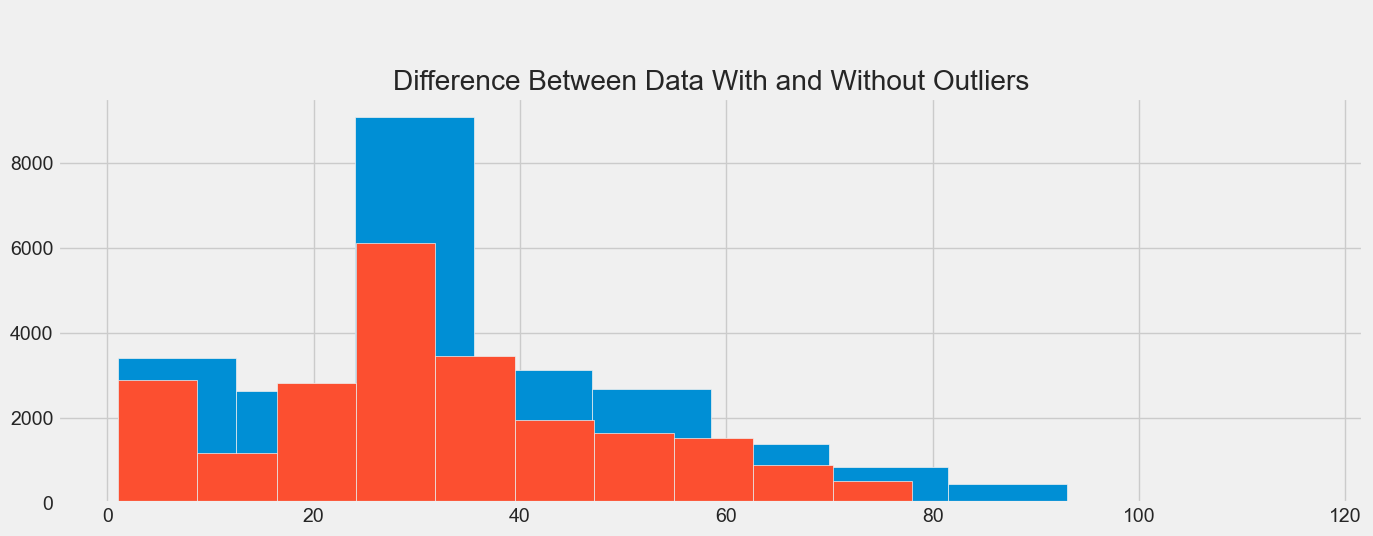

In [20]:
plt.hist(df['age']),plt.hist(stats_significant_data['age']),plt.title('\n\nDifference Between Data With and Without Outliers')

[Text(0.5, 1.0, '\n\nData with Outliers')]

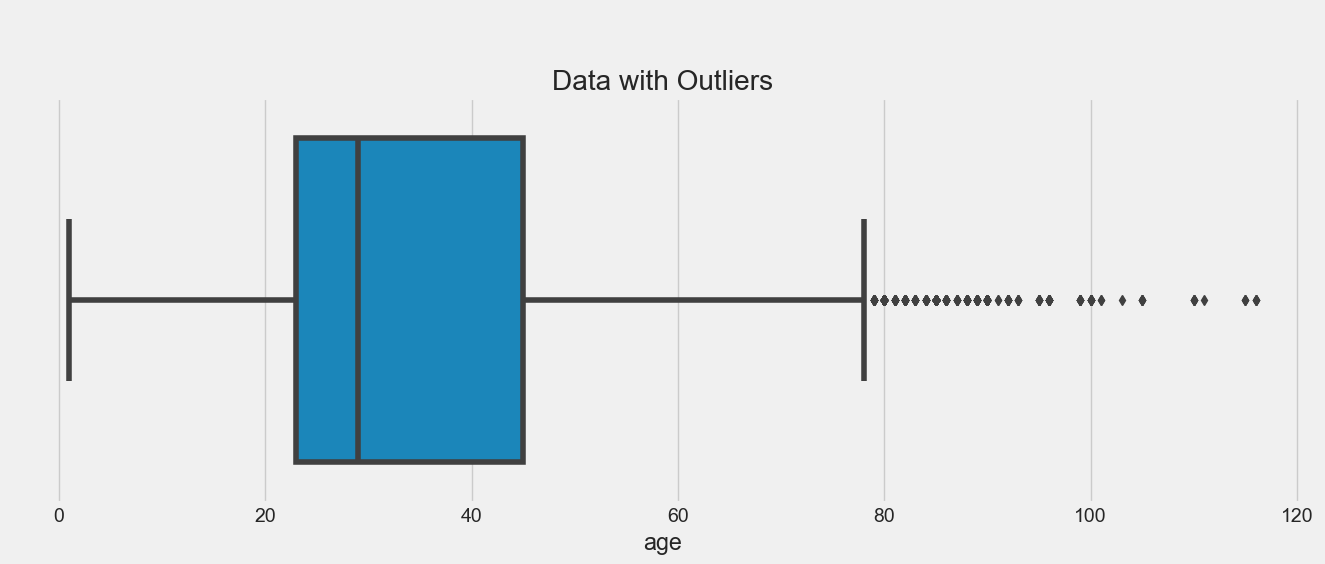

In [21]:
sns.boxplot(x=df['age']).set(title='\n\nData with Outliers')

[Text(0.5, 1.0, '\n\nData without Outliers')]

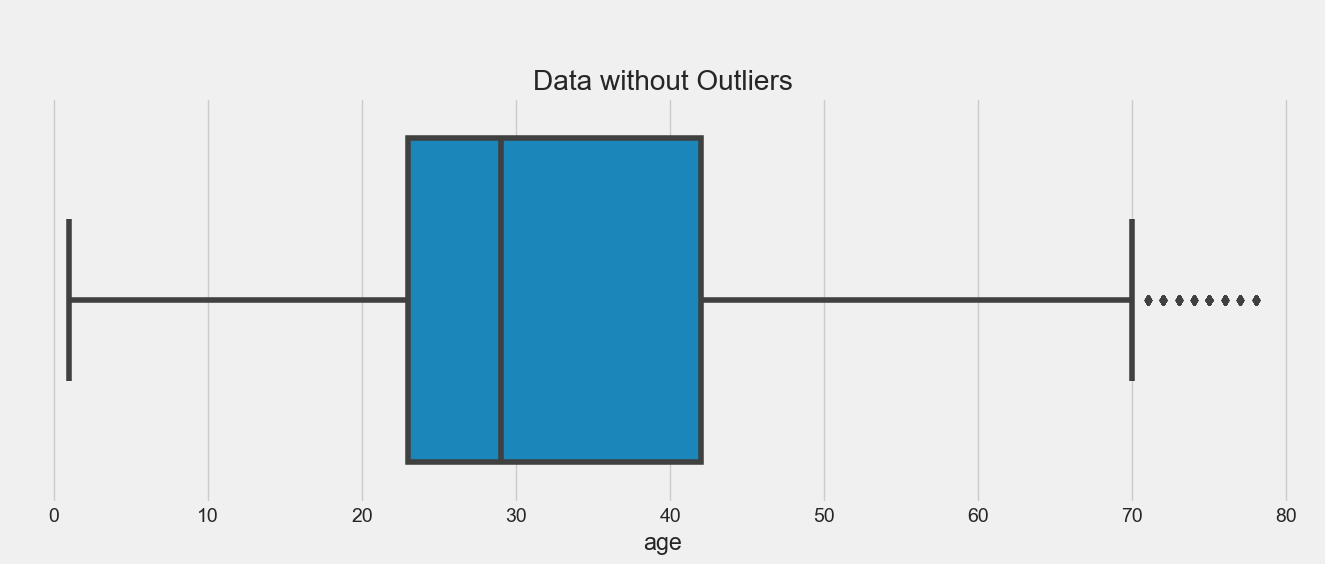

In [22]:
sns.boxplot(x=stats_significant_data['age']).set(title='\n\nData without Outliers')